# ML2024. ДЗ №1. Лыжин Роман

Задание 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.

Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1.1 (векторизация)
def diag_prod(X):
  diag = np.diag(X)
  return diag[diag != 0].prod()

In [ ]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
diag_prod(X)

3

In [ ]:
sizes = size1, size2, size3 = (100, 1000, 10000)
X1 = np.random.randint(0, 5, (size1, size1))
X2 = np.random.randint(0, 5, (size2, size2))
X3 = np.random.randint(0, 5, (size3, size3))

In [ ]:
res1_1 = %timeit -o diag_prod(X1)
res1_2 = %timeit -o diag_prod(X2)
res1_3 = %timeit -o diag_prod(X3)
results1 = np.array([res1_1.average, res1_2.average, res1_3.average]) * 10**9  #нс

11.2 µs ± 637 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
44 µs ± 5.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
300 µs ± 58.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
#1.2 (цикл)
def diag_prod(X):
  prod = 1
  for i in range(min(X.shape)):
    if (el := X[i][i]) != 0:
      prod *= el
  return prod

In [ ]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
diag_prod(X)

3

In [ ]:
res2_1 = %timeit -o diag_prod(X1)
res2_2 = %timeit -o diag_prod(X2)
res2_3 = %timeit -o diag_prod(X3)
results2 = np.array([res2_1.average, res2_2.average, res2_3.average]) * 10**9  #нс

<ipython-input-62-a261d2a4810e>:6: RuntimeWarning: overflow encountered in scalar multiply
  prod *= el


The slowest run took 4.36 times longer than the fastest. This could mean that an intermediate result is being cached.
109 µs ± 57.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
543 µs ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 5.26 times longer than the fastest. This could mean that an intermediate result is being cached.
9.91 ms ± 5.58 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#1.3 (наиболее читаемый вариант)
def diag_prod(X):
  diag = np.diag(X)
  nonzero_diag = diag[diag != 0]
  return np.prod(nonzero_diag)

In [ ]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
diag_prod(X)

3

In [ ]:
res3_1 = %timeit -o diag_prod(X1)
res3_2 = %timeit -o diag_prod(X2)
res3_3 = %timeit -o diag_prod(X3)
results3 = np.array([res3_1.average, res3_2.average, res3_3.average]) * 10**9  #нс

12.3 µs ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
16.7 µs ± 8.08 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
246 µs ± 65.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


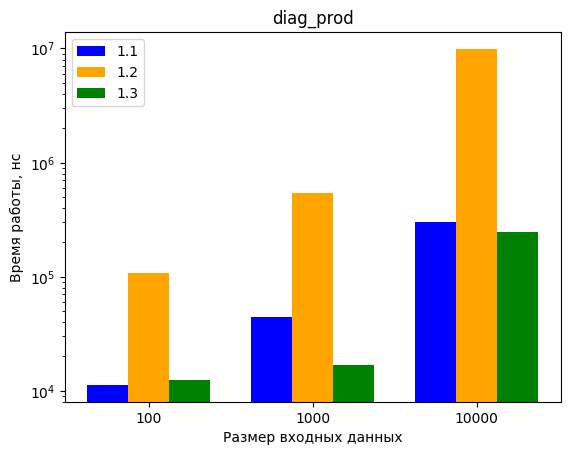

In [ ]:
plt.figure()
plt.title("diag_prod")

plt.bar(np.arange(1, 13, 4) - 1,
        results1,
        color='blue',
        width=1,
        align='center',
        label='1.1'
        )

plt.bar(np.arange(1, 13, 4),
        results2,
        color='orange',
        width=1,
        align='center',
        label='1.2'
        )

plt.bar(np.arange(1, 13, 4) + 1,
        results3,
        color='green',
        width=1,
        align='center',
        label='1.3'
        )
plt.xlabel("Размер входных данных")
plt.ylabel("Время работы, нс")
plt.xticks((1,5,9), ["100", "1000", "10000"])
plt.yscale('log')
plt.legend()
plt.show()

Анализ:

Входные данные - 100x100, 1000x1000, 10000x10000 элементов

1. Векторизованный вариант: ~ 6.5 - 217.0 нс. Выполняется быстрее всего.
2. Вариант с циклом выполняется: ~ 45.5 - 4410.0 нс. Выполняется дольше всего.
3. Наиболее читаемый вариант: ~ 8.8 - 288.0 нс. Является немного изменённым вариантом векторизации. Сравним по времени выполнения с ним.

На наборе данных в 10000x10000 элементов разница во времени выполнения наиболее значительная


Задание 2. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.

Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.


In [ ]:
#2.1 (векторизация)
def is_same_multiset(x, y):
  sorted_x = np.sort(x)
  sorted_y = np.sort(y)
  return np.array_equal(sorted_x, sorted_y)

In [ ]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])

is_same_multiset(x, y)

True

In [ ]:
sizes = size1, size2, size3 = (100, 1000, 10000)
x1 = np.random.randint(0,5, size1)
y1 = np.random.randint(0,5, size1)

x2 = np.random.randint(0,5, size2)
y2 = np.random.randint(0,5, size2)

x3 = np.random.randint(0,5, size3)
y3 = np.random.randint(0,5, size3)

In [ ]:
res1_1 = %timeit -o is_same_multiset(x1, y1)
res1_2 = %timeit -o is_same_multiset(x2, y2)
res1_3 = %timeit -o is_same_multiset(x3, y3)
results1 = np.array([res1_1.average, res1_2.average, res1_3.average]) * 10**9  #нс

11.4 µs ± 2.53 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
40.2 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
738 µs ± 168 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
#2.2 (цикл)
def is_same_multiset(x, y):
  if len(x) != len(y):
    return False
  sorted_x = np.sort(x)
  sorted_y = np.sort(y)
  for el_x, el_y in zip(sorted_x,sorted_x):
    if el_x != el_y:
      return False
  return True


In [ ]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])

is_same_multiset(x, y)

True

In [ ]:
res2_1 = %timeit -o is_same_multiset(x1, y1)
res2_2 = %timeit -o is_same_multiset(x2, y2)
res2_3 = %timeit -o is_same_multiset(x3, y3)
results2 = np.array([res2_1.average, res2_2.average, res2_3.average]) * 10**9  #нс

30.5 µs ± 9.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
260 µs ± 47.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.52 ms ± 487 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#2.3 (модифицированный вариант 2.2)
def is_same_multiset(x, y):
  if len(x) != len(y):
    return False
  sorted_x = np.sort(x)
  sorted_y = np.sort(y)

  for i in range(len(sorted_x)):
    if sorted_x[i] != sorted_y[i]:
      return False
  return True

In [ ]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])

is_same_multiset(x, y)

True

In [ ]:
res3_1 = %timeit -o is_same_multiset(x1, y1)
res3_2 = %timeit -o is_same_multiset(x2, y2)
res3_3 = %timeit -o is_same_multiset(x3, y3)
results3 = np.array([res3_1.average, res3_2.average, res3_3.average]) * 10**9  #нс

15.6 µs ± 5.4 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
133 µs ± 51.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.44 ms ± 361 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


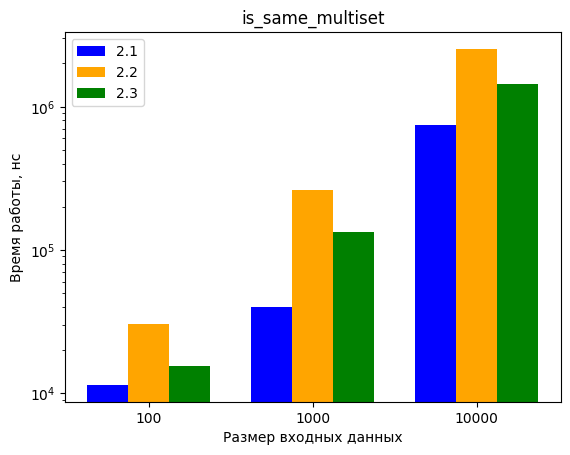

In [ ]:
plt.figure()
plt.title("is_same_multiset")

plt.bar(np.arange(1, 13, 4) - 1,
        results1,
        color='blue',
        width=1,
        align='center',
        label='2.1'
        )

plt.bar(np.arange(1, 13, 4),
        results2,
        color='orange',
        width=1,
        align='center',
        label='2.2'
        )

plt.bar(np.arange(1, 13, 4) + 1,
        results3,
        color='green',
        width=1,
        align='center',
        label='2.3'
        )
plt.xlabel("Размер входных данных")
plt.ylabel("Время работы, нс")
plt.xticks((1,5,9), ["100", "1000", "10000"])
plt.yscale('log')
plt.legend()
plt.show()

Анализ:

Входные данные - 100, 1000, 10000 элементов

1. Векторизованный вариант: ~ 9.1 - 495.0 нс. Выполняется быстрее всего.
2. Вариант с циклом: ~ 21.2 - 3350.0 нс. Выполняется дольше всего.
3. Модифицированный вариант цикла: ~ 8.3 - 1340.0 нс. Выполняется быстрее варианта с циклом , но медленнее векторизованного варианта. На небольших входных данных оказался быстрее векторизованного варианта.

На наборе данных в 10000 элементов разница во времени выполнения наиболее значительная


Задание 3. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.

Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.


In [ ]:
#3.1 (векторизация)
def max_before_zero(x):
  zero_inds = np.where(x == 0)[0]
  after_zero_inds = (zero_inds + 1)[zero_inds + 1 < len(x)]
  return np.max(x[after_zero_inds])


In [ ]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_before_zero(x)

5

In [ ]:
sizes = size1, size2, size3 = (100, 1000, 10000)
x1 = np.random.randint(0, 5, size1)
x2 = np.random.randint(0, 5, size2)
x3 = np.random.randint(0, 5, size3)

In [ ]:
res1_1 = %timeit -o max_before_zero(x1)
res1_2 = %timeit -o max_before_zero(x2)
res1_3 = %timeit -o max_before_zero(x3)
results1 = np.array([res1_1.average, res1_2.average, res1_3.average]) * 10**9  #нс

16.2 µs ± 6.45 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
18.5 µs ± 7 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
36.3 µs ± 872 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
#3.2 (цикл)
def max_before_zero(x):
  len_x = len(x)
  max_el = min(x)
  for i in range(len_x - 1):
    if x[i] == 0:
      max_el = max(max_el, x[i+1])
  return max_el

In [ ]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_before_zero(x)

5

In [ ]:
res2_1 = %timeit -o max_before_zero(x1)
res2_2 = %timeit -o max_before_zero(x2)
res2_3 = %timeit -o max_before_zero(x3)
results2 = np.array([res2_1.average, res2_2.average, res2_3.average]) * 10**9  #нс

44.5 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
444 µs ± 97.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.68 ms ± 661 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#3.3 (частично векторизованный вариант)
def max_before_zero(x):
  zero_inds = np.where(x == 0)[0]
  after_zero_inds = (zero_inds + 1)[zero_inds + 1 < len(x)]
  max_el = x[after_zero_inds[0]]
  for i in after_zero_inds:
    max_el = max(max_el, x[i])
  return max_el

In [ ]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_before_zero(x)

5

In [ ]:
res3_1 = %timeit -o max_before_zero(x1)
res3_2 = %timeit -o max_before_zero(x2)
res3_3 = %timeit -o max_before_zero(x3)
results3 = np.array([res3_1.average, res3_2.average, res3_3.average]) * 10**9  #нс

23.8 µs ± 5.19 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
126 µs ± 48.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.23 ms ± 518 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


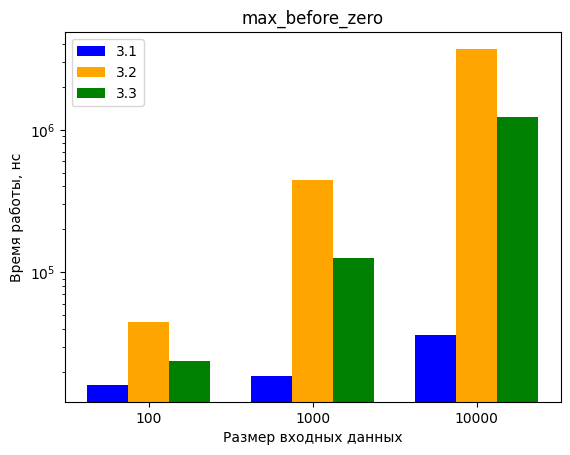

In [ ]:
plt.figure()
plt.title("max_before_zero")

plt.bar(np.arange(1, 13, 4) - 1,
        results1,
        color='blue',
        width=1,
        align='center',
        label='3.1'
        )

plt.bar(np.arange(1, 13, 4),
        results2,
        color='orange',
        width=1,
        align='center',
        label='3.2'
        )

plt.bar(np.arange(1, 13, 4) + 1,
        results3,
        color='green',
        width=1,
        align='center',
        label='3.3'
        )
plt.xlabel("Размер входных данных")
plt.ylabel("Время работы, нс")
plt.xticks((1,5,9), ["100", "1000", "10000"])
plt.yscale('log')
plt.legend()
plt.show()

Анализ:

Входные данные - 100, 1000, 10000 элементов

1. Векторизованный вариант: ~ 13.3 - 35.6 нс. Выполняется быстрее всего.
2. Вариант с циклом: ~ 31.3 - 2900.0 нс. Выполняется дольше всего.
3. Частично векторизованный вариант: ~ 18.8 - 715.0 нс. Выполняется быстрее варианта с циклом , но медленнее векторизованного варианта.

На наборе данных в 10000 элементов разница во времени выполнения наиболее значительная

Задание 4. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

In [ ]:
from imageio import imread, imsave

In [ ]:
img_url1 = 'https://reveltime.storage.yandexcloud.net/d8/venue8/photo/1109913/2023/4890601_1702025375.797.png'
img_matrix1 = imread(img_url1)
img_matrix1.shape

<ipython-input-92-d7adb21ad68a>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_matrix1 = imread(img_url1)


(1690, 2560, 3)

In [ ]:
img_url2 = 'https://avatars.mds.yandex.net/i?id=8b00dbb842da3863b278d25f424ed248508495fd-5480143-images-thumbs&n=13'
img_matrix2 = imread(img_url2)
img_matrix2.shape

<ipython-input-93-a782f4d965cd>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_matrix2 = imread(img_url2)


(270, 480, 3)

In [ ]:
img_url3 = 'https://savefrom.userecho.com/s/cache/ea/bc/eabc07367f22b6be43fd85efcbcee5a3.png'
img_matrix3 = imread(img_url3)
img_matrix3.shape

<ipython-input-94-449ce4a2d1b8>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_matrix3 = imread(img_url3)


(50, 50, 3)

In [ ]:
#4.1 (цикл)
def make_img_gray(img_matrix):
  height, width, numChannels = img_matrix.shape
  gray_matrix = np.zeros((height, width)).astype(np.uint8)
  gray_transform = np.array([0.299, 0.587, 0.114])
  for i in range(height):
    for j in range(width):
      new_value = 0
      for k in range(numChannels):
        new_value += img_matrix[i][j][k] * gray_transform[k]
      gray_matrix[i][j] = new_value

  return gray_matrix

In [ ]:
res1_1 = %timeit -o imsave('new1.png', make_img_gray(img_matrix1))
res1_2 = %timeit -o imsave('new2.png', make_img_gray(img_matrix2))
res1_3 = %timeit -o imsave('new3.png', make_img_gray(img_matrix3))
results1 = np.array([res1_1.average, res1_2.average, res1_3.average]) * 10**6 #мс

18.3 s ± 2.63 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
395 ms ± 8.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.91 ms ± 2.41 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#4.2 (векторизация)
def make_img_gray(img_matrix):
  gray_transform = np.array([0.299, 0.587, 0.114])
  return np.dot(img_matrix, gray_transform).astype(np.uint8)

In [ ]:
res2_1 = %timeit -o imsave('new1.png', make_img_gray(img_matrix1))
res2_2 = %timeit -o imsave('new2.png', make_img_gray(img_matrix2))
res2_3 = %timeit -o imsave('new3.png', make_img_gray(img_matrix3))
results2 = np.array([res2_1.average, res2_2.average, res2_3.average]) * 10**6  #мс

677 ms ± 9.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
25.1 ms ± 3.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
672 µs ± 85.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
#4.3 (частично векторизованный вариант)
def make_img_gray(img_matrix):
  height, width, numChannels = img_matrix.shape
  gray_matrix = np.zeros((height, width)).astype(np.uint8)
  gray_transform = np.array([0.299, 0.587, 0.114])
  for i in range(height):
    for j in range(width):
      gray_matrix[i][j] = np.dot(img_matrix[i][j], gray_transform)
  return gray_matrix

In [ ]:
res3_1 = %timeit -o imsave('new1.png', make_img_gray(img_matrix1))
res3_2 = %timeit -o imsave('new2.png', make_img_gray(img_matrix2))
res3_3 = %timeit -o imsave('new3.png', make_img_gray(img_matrix3))
results3 = np.array([res3_1.average, res3_2.average, res3_3.average]) * 10**6  #мс

13.7 s ± 881 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
461 ms ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.61 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


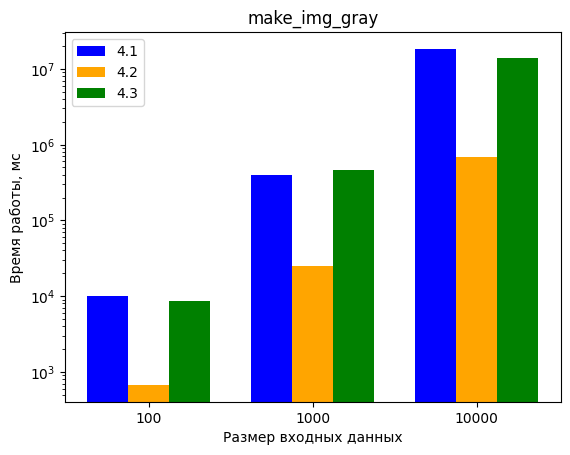

In [ ]:
plt.figure()
plt.title("make_img_gray")

plt.bar(np.arange(1, 13, 4) - 1,
        results1[::-1],
        color='blue',
        width=1,
        align='center',
        label='4.1'
        )

plt.bar(np.arange(1, 13, 4),
        results2[::-1],
        color='orange',
        width=1,
        align='center',
        label='4.2'
        )

plt.bar(np.arange(1, 13, 4) + 1,
        results3[::-1],
        color='green',
        width=1,
        align='center',
        label='4.3'
        )
plt.xlabel("Размер входных данных")
plt.ylabel("Время работы, мс")
plt.xticks((1,5,9), ["100", "1000", "10000"])
plt.yscale('log')
plt.legend()
plt.show()

Анализ:

Входные данные - изображения на 1690x2560, 270x480, 50x50 пикселей

1. Вариант с циклом: ~ 10.1 - 18500.0 мс. Выполняется дольше всего.
2. Векторизованный вариант: ~ 0.8 - 697.0 мс. Выполняется быстрее всего.
3. Частично векторизованный вариант: ~ 7.0 - 14700.0 мс. Время выполнения сопоставимо с вариантом с циклом.

На наборе данных в 10000 элементов разница во времени выполнения наиболее значительная

Задание 5. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.

Пример: x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2]). Ответ: (np.array([2, 3, 5, 2]), np.array([3, 3, 1, 2])).

In [ ]:
#5.1 (векторизация)
def run_length_encoding(x):
  diffs_x = np.diff(x)
  unique_digits = np.where(diffs_x != 0)
  new_digits_indicies = np.where(diffs_x != 0)[0] + 1
  new_digits_indicies = np.concatenate(([0], new_digits_indicies, [len(x)]))

  unique_digits = x[new_digits_indicies[:-1]]
  digits_lens = np.diff(new_digits_indicies)

  return (unique_digits, digits_lens)

In [ ]:
x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2])
run_length_encoding(x)

(array([2, 3, 5, 2]), array([3, 3, 1, 2]))

In [ ]:
sizes = size1, size2, size3 = (100, 1000, 10000)
x1 = np.random.randint(0, 10, size1)
x2 = np.random.randint(0, 10, size2)
x3 = np.random.randint(0, 10, size3)

In [ ]:
res1_1 = %timeit -o run_length_encoding(x1)
res1_2 = %timeit -o run_length_encoding(x2)
res1_3 = %timeit -o run_length_encoding(x3)
results1 = np.array([res1_1.average, res1_2.average, res1_3.average]) * 10**9  #нс

28.9 µs ± 7.04 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
36.3 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
121 µs ± 47.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
#5.2 (цикл)
def run_length_encoding(x):
  curr_el = x[0]
  count = 0
  digits_lens = np.empty(0).astype(int)
  unique_digits = np.empty(0).astype(int)
  for el in x:
    if el == curr_el:
      count += 1
    else:
      unique_digits = np.append(unique_digits, curr_el)
      digits_lens = np.append(digits_lens, count)

      curr_el = el
      count = 1
  unique_digits = np.append(unique_digits, curr_el)
  digits_lens = np.append(digits_lens, count)

  return (unique_digits, digits_lens)


In [ ]:
x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2])
run_length_encoding(x)

(array([2, 3, 5, 2]), array([3, 3, 1, 2]))

In [ ]:
res2_1 = %timeit -o run_length_encoding(x1)
res2_2 = %timeit -o run_length_encoding(x2)
res2_3 = %timeit -o run_length_encoding(x3)
results2 = np.array([res2_1.average, res2_2.average, res2_3.average]) * 10**9  #нс

1.43 ms ± 584 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.35 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
103 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
#5.3 (наиболее читаемый вариант, улучшенная векторизация)
def run_length_encoding(x):
    diff = np.concatenate(([1], np.diff(x), [1]))
    run_starts = np.where(diff != 0)[0]
    run_lengths = np.diff(run_starts)
    unique_digits = x[run_starts[:-1]]
    return (unique_digits, run_lengths)

In [ ]:
x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2])
run_length_encoding(x)

(array([2, 3, 5, 2]), array([3, 3, 1, 2]))

In [ ]:
res3_1 = %timeit -o run_length_encoding(x1)
res3_2 = %timeit -o run_length_encoding(x2)
res3_3 = %timeit -o run_length_encoding(x3)
results3 = np.array([res3_1.average, res3_2.average, res3_3.average]) * 10**9  #нс

24.2 µs ± 2.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
22.5 µs ± 6.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
54.8 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


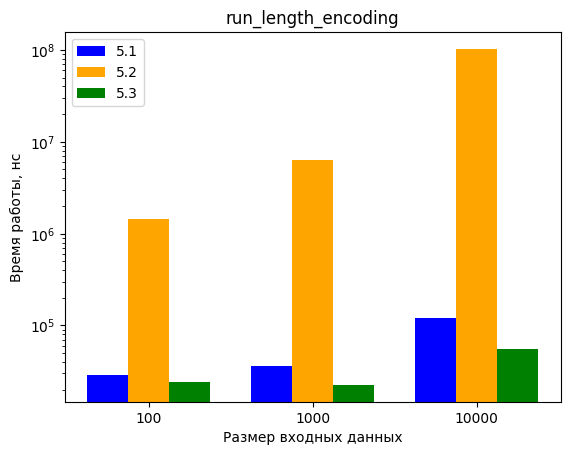

In [ ]:
plt.figure()
plt.title("run_length_encoding")

plt.bar(np.arange(1, 13, 4) - 1,
        results1,
        color='blue',
        width=1,
        align='center',
        label='5.1'
        )

plt.bar(np.arange(1, 13, 4),
        results2,
        color='orange',
        width=1,
        align='center',
        label='5.2'
        )

plt.bar(np.arange(1, 13, 4) + 1,
        results3,
        color='green',
        width=1,
        align='center',
        label='5.3'
        )
plt.xlabel("Размер входных данных")
plt.ylabel("Время работы, нс")
plt.xticks((1,5,9), ["100", "1000", "10000"])
plt.yscale('log')
plt.legend()
plt.show()

Анализ:

Входные данные - 100, 1000, 10000 элементов

1. Векторизованный вариант: ~ 35.1 - 71.2 нс. Выполняется быстро.
2. Вариант с циклом: ~ 726.0 - 103000.0 нс. Выполняется дольше всего.
3. Частично векторизованный вариант: ~ 15.9 - 54.6 нс. Выполняется быстрее всего и быстрее первого векторизованного варианта за счёт модификации.

На наборе данных в 10000 элементов разница во времени выполнения наиболее значительная

Вывод:

При выполнения данной работы я научился применять основные методы библиотеки NumPy для выполнения операций над матрицами. Также были освоены навыки графического отображения данных с помощью библиотеки mathplotlib.

Каждая задача была решена 3 способами, в том числе полностью векторизованный вариант, и вариант с циклами. При сравнении скорости выполнения получил, что использование векторизованных операций может быть в разы эффективнее, чем использование циклов. Это в особенности касается больших объёмов входных данных, на небольшой выборке данная разница может быть незаметной. Данная особенность была наглядно представлена при помощи построения соответствующих графиков.